In [1]:
import pandas as pd

import numpy as np
from sklearn.linear_model import LinearRegression

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import pyreadr
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tfp = pd.read_csv("tfp-at-constant-national-prices-20111.csv")
tfp = tfp.rename(columns = {"Entity" : "Country"})
tfp = tfp.replace({'United States' : 'USA'}).rename(columns = {"Total factor productivity index (using national accounts) (2017=1)" : "TFP"})
tfp["TFP"] = tfp["TFP"]*100

In [3]:
tfp[tfp['Country'] == 'Russia'].tail()

,Country,Code,Year,TFP
4782,Russia,RUS,2015,98.802555
4783,Russia,RUS,2016,98.866880
4784,Russia,RUS,2017,100.000000
4785,Russia,RUS,2018,101.935399
4786,Russia,RUS,2019,103.138089


In [4]:
pwt = pd.read_excel("pwt100.xlsx", sheet_name = "Data")[["country", "year", "ctfp", "cwtfp", "rtfpna", "rwtfpna"]]

#ctfp	TFP level at current PPPs (USA=1)
#cwtfp	Welfare-relevant TFP levels at current PPPs (USA=1)
#rtfpna	TFP at constant national prices (2017=1)
#rwtfpna	Welfare-relevant TFP at constant national prices (2017=1)

In [5]:
pwt = (pwt
    .rename(columns = {"country" : "Country", "year" : "Year", "rtfpna" : "TFP", "ctfp" : "CTFP", "cwtfp" : "CWTFP", "rwtfpna" : "WTFP"})
    .replace({'United States' : 'USA'}))

pwt[["CTFP", "CWTFP", "TFP", "WTFP"]]= pwt[["CTFP", "CWTFP", "TFP", "WTFP"]] * 100

##Removing USA as value always == 1
v = pwt[pwt["Country"] == "USA"]
v[["ctfp", "cwtfp"]] = np.nan
pwt[pwt["Country"] == "USA"] = v

pwt[pwt["Country"] == "USA"].head(10)

C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\2968134359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\2968134359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan


,Country,Year,CTFP,CWTFP,TFP,WTFP
12110,USA,1950,NaN,NaN,NaN,NaN
12111,USA,1951,NaN,NaN,NaN,NaN
12112,USA,1952,NaN,NaN,NaN,NaN
12113,USA,1953,NaN,NaN,NaN,NaN
12114,USA,1954,100.0,100.0,65.009677,64.128375
12115,USA,1955,100.0,100.0,67.113054,66.248530
12116,USA,1956,100.0,100.0,66.731364,65.639770
12117,USA,1957,100.0,100.0,67.457569,66.202027
12118,USA,1958,100.0,100.0,67.579633,66.899884
12119,USA,1959,100.0,100.0,69.490474,68.800765


In [6]:
WID_Data = pd.read_excel("WID_Data.xlsx", sheet_name = "Data")
WID_Data[WID_Data['Year'] == 2015].head(20)

,Percentile,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,...,sptinc_992_j_SN\nPre-tax national income \nBottom 50% | share | adults | equal split\nSenegal,sptinc_992_j_MG\nPre-tax national income \nBottom 50% | share | adults | equal split\nMadagascar,sptinc_992_j_CD\nPre-tax national income \nBottom 50% | share | adults | equal split\nDR Congo,sptinc_992_j_PL\nPre-tax national income \nBottom 50% | share | adults | equal split\nPoland,sptinc_992_j_EE\nPre-tax national income \nBottom 50% | share | adults | equal split\nEstonia,sptinc_992_j_QT-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nSouth Africa (at market exchange rate),sptinc_992_j_PG\nPre-tax national income \nBottom 50% | share | adults | equal split\nPapua New Guinea,sptinc_992_j_QO-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nNorth Africa (at market exchange rate),sptinc_992_j_QF-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nOceania (at market exchange rate),sptinc_992_j_ID\nPre-tax national income \nBottom 50% | share | adults | equal split\nIndonesia
65,pall,2015,0.432388,0.501557,0.540364,0.651422,0.538078,0.726932,0.651527,0.559097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,p0p50,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1338,0.1248,0.1264,0.1984,0.1729,0.0581,0.1297,0.1327,0.1171,0.1475
209,p50p90,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3891,0.3676,0.3852,0.4238,0.4692,0.2879,0.4082,0.3860,0.5114,0.4028
281,p90p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4771,0.5076,0.4884,0.3778,0.3579,0.6540,0.4621,0.4813,0.3714,0.4497
353,p99p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1318,0.1517,0.1463,0.1491,0.1114,0.1938,0.1628,0.1690,0.1296,0.1808


In [7]:
WID_G = WID_Data.iloc[:, 0:250]
WID_G = WID_G[WID_G.Percentile == 'pall'].drop(['Percentile'], axis = 1)
WID_G.head()

,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,gptinc_992_j_SK\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSlovakia,...,gptinc_992_j_SN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSenegal,gptinc_992_j_MG\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMadagascar,gptinc_992_j_CD\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nDR Congo,gptinc_992_j_PL\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nPoland,gptinc_992_j_EE\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEstonia,gptinc_992_j_QT-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSouth Africa (at market exchange rate),gptinc_992_j_PG\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nPapua New Guinea,gptinc_992_j_QO-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nNorth Africa (at market exchange rate),gptinc_992_j_QF-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOceania (at market exchange rate),gptinc_992_j_ID\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nIndonesia
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
WID_G1 = WID_G
WID_G1 = WID_G1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Gini")

In [9]:
WID_G2 = WID_G1
WID_G2['Country'] = WID_G2['Country'].str.split('\n').str[3]
WID_G2 = WID_G2.replace({'Russian Federation' : 'Russia'})
WID_G2['Gini'] = WID_G2["Gini"]########################################################


In [10]:
WID_G2['Gini'].describe()

count    10584.000000
mean         0.580033
std          0.106081
min          0.208031
25%          0.499880
50%          0.593025
75%          0.651422
max          0.946778
Name: Gini, dtype: float64

In [11]:
#tfp_gini = pd.concat([tfp, WID_G2], axis=1, join="inner")
tfp_gini = pwt.merge(WID_G2, on = ['Country', 'Year'], how="right")
tfp_gini = tfp_gini[tfp_gini["Country"] != "South Africa"] ## Why is SA in the dataset twice


In [12]:
swiid = pd.read_csv("swiid9_5\swiid9_5_summary.csv").replace(0,np.nan)

In [13]:
swiid = swiid.rename(columns = {'country' : 'Country', 'year': 'Year'})
swiid['Year'] = swiid['Year'].astype(int)
tfp_gini = tfp_gini.merge(swiid, on=['Country', 'Year'], how='outer')
tfp_gini

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Switzerland,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,1954,80.12383,76.326257,64.038914,65.403175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,Yugoslavia,1986,NaN,NaN,NaN,NaN,NaN,33.9,3.10,47.2,7.20,NaN,NaN,NaN,NaN
18481,Yugoslavia,1987,NaN,NaN,NaN,NaN,NaN,34.2,3.11,47.3,7.22,NaN,NaN,NaN,NaN
18482,Yugoslavia,1988,NaN,NaN,NaN,NaN,NaN,34.5,3.13,47.5,7.24,NaN,NaN,NaN,NaN
18483,Yugoslavia,1989,NaN,NaN,NaN,NaN,NaN,34.7,3.12,47.6,7.25,NaN,NaN,NaN,NaN


In [100]:
### Choosing Measure of gini
tfp_gini['WIID'] = tfp_gini['Gini']
tfp_gini['Gini'] = tfp_gini['gini_disp']

In [101]:
# Normalize Gini Coefficient
#tfp_gini["NGini"] = np.nan
tfp_gini["-Gini"] = np.nan
tfp_gini["dGini"] = np.nan
tfp_gini["d5Gini"] = np.nan
tfp_gini["dpGini"] = np.nan
tfp_gini["d5pGini"] = np.nan
tfp_gini["dNGini"] = np.nan
tfp_gini["dpGinim5"] = np.nan
tfp_gini["Ginim5"] = np.nan

# Find the changes tfp and gini
tfp_gini["dTFP"] = np.nan
tfp_gini["dpTFP"] = np.nan
tfp_gini["dpTFPm1"] = np.nan
tfp_gini["dpTFPm2"] = np.nan
tfp_gini["dpTFPavg"] = np.nan
tfp_gini["-dpTFP^2"] = np.nan
tfp_gini["dpTFP^2"] = np.nan
tfp_gini["dpTFP^3"] = np.nan
tfp_gini["log(dpTFP)"] = np.nan

tfp_gini["dCTFP"] = np.nan
tfp_gini["dpCTFP"] = np.nan
tfp_gini["dCTFPm1"] = np.nan
tfp_gini["dCTFPm2"] = np.nan
tfp_gini["dCTFPavg"] = np.nan
tfp_gini["-dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^3"] = np.nan

tfp_gini["dWTFP"] = np.nan
tfp_gini["dWTFPm1"] = np.nan
tfp_gini["dWTFPm2"] = np.nan
tfp_gini["dWTFPavg"] = np.nan
tfp_gini["-dWTFP^2"] = np.nan
tfp_gini["dWTFP^2"] = np.nan
tfp_gini["dWTFP^3"] = np.nan



for x in tfp_gini["Country"].unique():
    temp = tfp_gini[tfp_gini["Country"] == x]

    #b = float(temp.loc[temp["Year"] == 2017, "Gini"])
    #temp["NGini"] = temp["Gini"].div(b) * 100

    temp["-Gini"] = temp["Gini"] - temp["Gini"].min()

    temp.dGini = temp['Gini'].diff(periods=1)
    temp.d5Gini = temp['Gini'].diff(periods=5)
    temp.dpGini = temp['dGini'].div(temp['Gini']) * 100
    temp.d5pGini = temp['d5Gini'].div(temp['Gini']) * 100
    #temp.dNGini = temp['NGini'].diff(periods=1)
    temp["dpGinim5"] = temp.dpGini.shift(+5)
    temp.Ginim5 = temp.Gini.shift(+5)

    temp["dTFP"] = temp['TFP'].diff(periods=1)
    temp["dpTFP"] = temp['dTFP'].div(temp['TFP'])*100
    temp["dpTFPm1"] = temp.dpTFP.shift(+1)
    temp["dpTFPm2"] = temp.dpTFPm1.shift(+1)
    temp["dpTFPavg"] = (temp["dpTFP"] + temp["dpTFPm1"] + temp["dpTFPm2"]).div(3)
    temp["-dpTFP^2"] = temp.dTFP*abs(temp.dTFP)
    temp["dpTFP^2"] = temp.dpTFP ** 2
    temp["dpTFP^3"] = temp.dpTFP ** 3
    temp["log(dpTFP)"] = np.log(temp["dpTFP"])

    temp["dCTFP"] = temp['CTFP'].diff(periods=1)
    temp["dpCTFP"] = temp['dCTFP'].div(temp['CTFP'])*100
    temp["dCTFPm1"] = temp.dCTFP.shift(+1)
    temp["dCTFPm2"] = temp.dCTFPm1.shift(+1)
    temp["dCTFPavg"] = (temp["dCTFP"] + temp["dCTFPm1"] + temp["dCTFPm2"]).div(3)
    temp["-dpCTFP^2"] = temp.dCTFP*abs(temp.dCTFP)
    temp["dpCTFP^2"] = temp.dpCTFP ** 2 
    temp["dpCTFP^3"] = temp.dpCTFP ** 3

    temp["dWTFP"] = temp['WTFP'].diff(periods=1)
    temp["dWTFPm1"] = temp.dWTFP.shift(+1)
    temp["dWTFPm2"] = temp.dWTFPm1.shift(+1)
    temp["dWTFPavg"] = (temp["dWTFP"] + temp["dWTFPm1"] + temp["dWTFPm2"]).div(3)
    temp["-dWTFP^2"] = temp.dWTFP*abs(temp.dWTFP)
    temp["dWTFP^2"] = temp.dWTFP ** 2
    temp["dWTFP^3"] = temp.dWTFP ** 3

    tfp_gini[tfp_gini["Country"] == x] = temp

C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\2899035954.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["-Gini"] = temp["Gini"] - temp["Gini"].min()
C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\2899035954.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dGini = temp['Gini'].diff(periods=1)
C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\2899035954.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [102]:
##Add GDP per capita before removing years
GDPpc_Data = (pd.read_excel("mpd2020.xlsx", sheet_name = "Full data")
                .drop(columns = ["pop", "countrycode"])
                .rename(columns = {"gdppc" : "GDPPC", "country" : "Country", "year" : "Year"})
                .replace({'United States' : 'USA'}))
#GDPpc_Data.head()
TGall = tfp_gini.merge(GDPpc_Data, on = ['Country', 'Year'], how = 'left')

TGall["dGDPPC"] = np.nan
TGall["d5GDPPC"] = np.nan
TGall["dpGDPPC"] = np.nan
TGall["d5pGDPPC"] = np.nan
TGall["dpGDPPC^2"] = np.nan
TGall["lnGDPPC"] = np.nan

##Differnece in GDPpc_Data
for x in TGall["Country"].unique():
    temp = TGall[TGall["Country"] == x]

    temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["d5GDPPC"] = temp['GDPPC'].diff(periods=5)
    temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
    temp["d5pGDPPC"] = temp["d5GDPPC"].div(temp['GDPPC'])*100
    temp["dpGDPPC^2"] = temp["dpGDPPC"] ** 2
    temp["lnGDPPC"] = np.log(temp["GDPPC"])

    TGall[TGall["Country"] == x] = temp

C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\3236665605.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\3236665605.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["d5GDPPC"] = temp['GDPPC'].diff(periods=5)
C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\3236665605.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [103]:
TGall["lnGG"] = TGall["lnGDPPC"].mul(TGall['Gini'])
TGall["lnGGm5"] = TGall["lnGG"].shift(5)
TGall["lnGDPPCm5"] = TGall["lnGDPPC"].shift(5)
TGall = TGall.replace([np.nan, -np.inf], 0)

In [104]:
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)

https://ourworldindata.org/taxation 

In [105]:
tmitr = (pd.read_csv("top-income-tax-rates-piketty.csv")
        .rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        .drop(columns = "Code")
        .replace({'United States' : 'USA'}))

TGall = TGall.merge(tmitr, on = ['Country', 'Year'], how = 'left')

In [106]:
tmitr

,Country,Year,TMITR
0,France,1900,0
1,France,1901,0
2,France,1902,0
3,France,1903,0
4,France,1904,0
...,...,...,...
585,USA,2013,40
586,USA,2014,40
587,USA,2015,40
588,USA,2016,40


In [107]:
oil = (pd.read_csv("API_TX.VAL.FUEL.ZS.UN_DS2_en_csv_v2_5996827.csv")
        #.rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        #.drop(columns = "Code")
        .replace({'United States' : 'USA', 'Country Name': 'Country'}))
oil = oil.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis = 1)
oil = pd.melt(oil, id_vars=['Country Name'], value_vars= oil.columns[1:64])
oil = oil.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Oil"})
oil['Year'] = oil['Year'].astype(int)
TGall = TGall.merge(oil, on = ['Country', 'Year'], how = 'left' )

In [108]:
Pr = pd.read_excel("statistic_id262860_brent-crude-oil-price-annually-1976-2023.xlsx", sheet_name="Data")
Pr['Year'] = Pr['Year'].astype(int)
TGall = TGall.merge(Pr, on = ['Year'], how = 'left')
TGall['OilP'] = TGall['Oil'].mul(TGall['Price'])

In [109]:
## IV
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
model = linear_model.LinearRegression()
reg = model.fit(X[['lnGDPPC']], X['Gini'])
print(model.coef_[0])
#TGall['predIVGini'] = reg.predict(TGall['lnGDPPC'].values.reshape(-1, 1))
TGall['IVGini'] = TGall['Gini'] - TGall['lnGDPPC'].mul(model.coef_[0])
#TGall['IVGini'] = TGall['Gini'] - TGall['predIVGini']
TGall['IVGini'] = TGall['IVGini'].replace(0, np.nan)
TGall['IVGinim5'] = TGall["IVGini"].shift(5)
TGall["IVlnGG"] = TGall["lnGDPPC"].mul(TGall['IVGini'])
TGall["IVlnGGm5"] = TGall["IVlnGG"].shift(5)

TGall['IVGini2m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5'])
TGall['IVlnGG2m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5'])

-0.3159730227077977


https://ourworldindata.org/taxation

https://stats.oecd.org/viewhtml.aspx?datasetcode=TABLE_I7&lang=en 

In [110]:
TMITR = (pd.read_csv("TMITR.csv")
        .drop(columns = ["COU", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"]))
TMITR = (TMITR[TMITR["TAX"] == "TOP_TRATE"]
        .drop(columns = ["TAX", "Income Tax"])
        .rename(columns = {"Value" : "TMITR2"})
        .replace({'United States' : 'USA'}))
TGall = TGall.merge(TMITR, on = ['Country', 'Year'], how = 'left')

In [111]:
nData = ( pd.read_csv("API_SP.POP.GROW_DS2_en_csv_v2_5995052.csv")
         .drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
         .rename(columns={"Country Name": "Country"})
)
nData = pd.melt(nData, id_vars=["Country"], var_name="Year", value_name="n")
nData.Year = nData.Year.astype(int)
nData

,Country,Year,n
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN
...,...,...,...
16753,Kosovo,2022,-1.355874
16754,"Yemen, Rep.",2022,2.144628
16755,South Africa,2022,0.841058
16756,Zambia,2022,2.758032


In [112]:
TGall = TGall.merge(nData, on=["Country", "Year"], how="left")
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,Price,OilP,IVGini,IVGinim5,IVlnGG,IVlnGGm5,IVGini2m5,IVlnGG2m5,TMITR2,n
0,Switzerland,1950,0.00000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,1951,0.00000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,1952,0.00000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,1953,0.00000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,1954,80.12383,76.326257,64.038914,65.403175,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,Yugoslavia,1986,0.00000,0.000000,0.000000,0.000000,33.9,33.9,3.10,47.2,...,14.4,NaN,33.9,32.4,0.0,0.0,1049.76,0.0,NaN,NaN
18481,Yugoslavia,1987,0.00000,0.000000,0.000000,0.000000,34.2,34.2,3.11,47.3,...,18.4,NaN,34.2,32.7,0.0,0.0,1069.29,0.0,NaN,NaN
18482,Yugoslavia,1988,0.00000,0.000000,0.000000,0.000000,34.5,34.5,3.13,47.5,...,15.0,NaN,34.5,33.0,0.0,0.0,1089.00,0.0,NaN,NaN
18483,Yugoslavia,1989,0.00000,0.000000,0.000000,0.000000,34.7,34.7,3.12,47.6,...,18.2,NaN,34.7,33.3,0.0,0.0,1108.89,0.0,NaN,NaN


In [113]:
#pd.get_dummies(TGall["Country"])

In [114]:
## State Fixed Effects
#TGallFE = pd.concat([TGall, pd.get_dummies(TGall["Country"])], axis = 1)

In [115]:
#TGallFE.iloc[:,TGallFE.columns.get_loc("Albania"):].tail()

In [116]:
def cd(country = "Canada"):
    return tfp_gini[tfp_gini['Country'] == country]

In [117]:
def all(country = "Canada"):
        return TGall[TGall['Country'] == country]

In [118]:
def TGC(vars = ["TFP", "Gini", "-Gini", "dpTFP", "dpGini", "dNGini"], FE = False, Year = False):
    TGallD = TGall[vars]
    if Year == True:
        TGallD = pd.concat([TGall["Year"], TGallD], axis = 1)
    if FE == True:
        TGallD = pd.concat([TGallD, pd.get_dummies(TGall["Country"])], axis = 1)
    #if d == True:
    #    TGallD = pd.concat([TGall["dpGDPPC"], TGallD], axis = 1)
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD.replace(0, np.nan).dropna(axis = 0)
    #TGallD = TGallD[(np.abs(stats.zscore(TGallD[vars])) < 3).all(axis=1)]
    return TGallD

In [119]:
def TGCc(vars = ["TFP", "Gini", "NGini", "-Gini", "dTFP", "dGini", "dNGini", "dTFPavg"], country = "Canada"):
    TGallD = TGall[TGall['Country'] == country]
    TGallD = TGallD[vars].dropna()
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD[(np.abs(stats.zscore(TGallD)) < 3).all(axis=1)]
    return TGallD

In [120]:
# TGCc(["CTFP", "TFP", "dCTFP", "dTFP", "dpCTFP", "dpTFP"], country = "Canada").tail(15).to_excel("dTFP_Canada.xlsx")

In [121]:
print(len(WID_G2))
#Need to compare country names
print(len(tfp_gini))
print(len(swiid))

17856
18485
6109


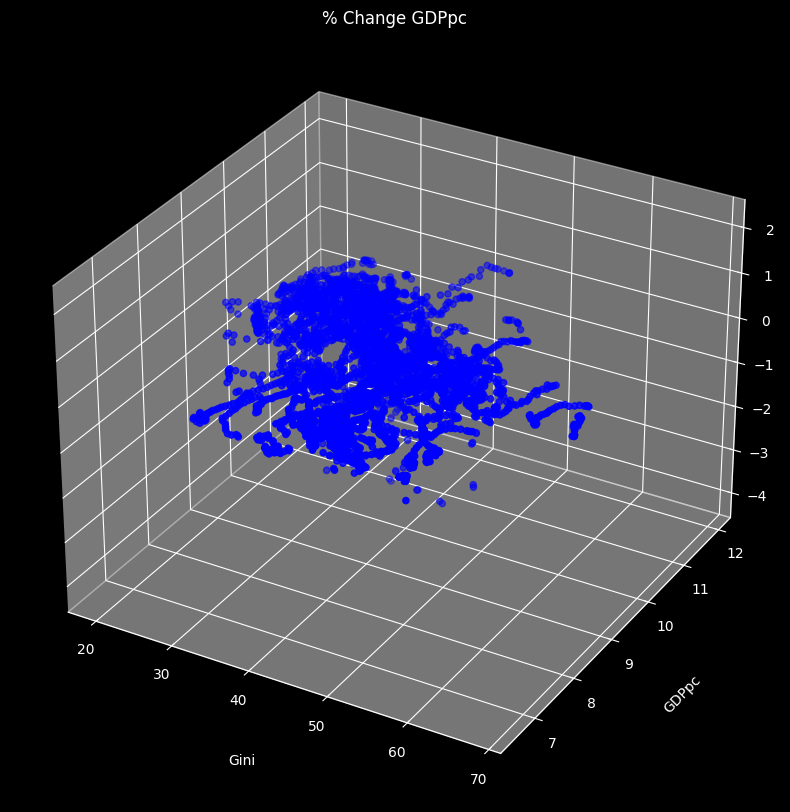

In [122]:
temp = TGall[['IVGinim5', "lnGDPPCm5", "lnGDPPC"]].replace(0,np.nan).dropna()
x = temp['IVGinim5']
y = temp['lnGDPPCm5']
z = temp['lnGDPPC'] - temp['lnGDPPCm5']

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()



ax.scatter(x, y, z, c = 'b')
ax.set_title('% Change GDPpc')

# Set axes label
ax.set_xlabel('Gini', labelpad=20)
ax.set_ylabel('GDPpc', labelpad=20)
ax.set_zlabel('% Change GDPpc', labelpad=20)

plt.show()

In [123]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X.to_csv("tansferdata.csv")

In [124]:
X = TGall[["Year", "Country", "gini_mkt", "gini_disp", "GDPPC", "n"]].replace(0,np.nan).dropna()
X = X[X["Country"]=="Brazil"]
X[["GDPPC", "gini_mkt", "gini_disp", "n"]].describe()

,GDPPC,gini_mkt,gini_disp,n
count,58.000000,58.000000,58.000000,58.000000
mean,8780.843333,60.858621,51.318966,1.820991
std,3516.604074,2.245075,2.331136,0.690498
min,3585.000000,55.800000,46.300000,0.792263
25%,6706.250000,59.925000,50.625000,1.150962
50%,8239.500000,61.250000,51.500000,1.842507
75%,10800.893925,62.250000,52.825000,2.361764
max,15826.000000,64.200000,55.300000,3.015260


In [125]:
len(tfp_gini["Country"].unique())

285

In [126]:
men = TGall.replace(0,np.nan).describe()

Text(0.5, 0, 'Gini')

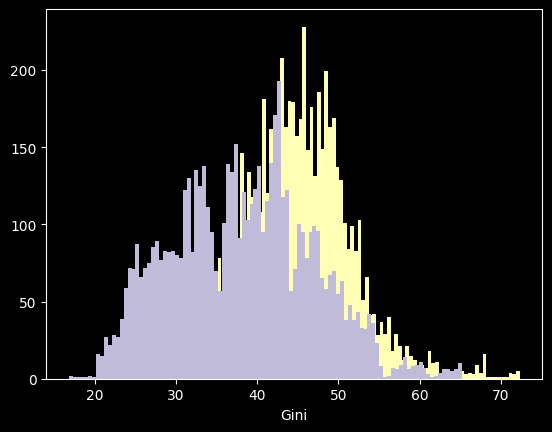

In [127]:
wiid = TGall.WIID.replace(0,np.nan).mul(100).dropna()
gini_disp = TGall.gini_disp.replace(0,np.nan).dropna()
gini_mkt = TGall.gini_mkt.replace(0,np.nan).dropna()
plt.style.use('dark_background')

plt.hist(wiid, 100)
plt.hist(gini_mkt, 100)
plt.hist(gini_disp, 100)

plt.xlabel("Gini")

In [128]:
cd("Serbia").tail()

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,-dpCTFP^2,dpCTFP^2,dpCTFP^3,dWTFP,dWTFPm1,dWTFPm2,dWTFPavg,-dWTFP^2,dWTFP^2,dWTFP^3
11371,Serbia,2017,53.757489,54.987979,100.000000,100.000000,33.1,33.1,1.04,50.4,...,-0.316588,1.095512,-1.146636,0.235772,-3.761423,-0.618899,-1.381516,0.055588,0.055588,0.013106
11372,Serbia,2018,53.174329,55.680108,101.566768,102.922392,32.8,32.8,1.10,50.2,...,-0.340075,1.202739,-1.319037,2.922392,0.235772,-3.761423,-0.201086,8.540374,8.540374,24.958321
11373,Serbia,2019,53.560597,56.793004,102.820683,106.085467,32.6,32.6,1.19,50.0,...,0.149203,0.520099,0.375085,3.163075,2.922392,0.235772,2.107080,10.005046,10.005046,31.646716
11374,Serbia,2020,NaN,NaN,NaN,NaN,32.5,32.5,1.39,49.9,...,NaN,NaN,NaN,NaN,3.163075,2.922392,NaN,NaN,NaN,NaN
11375,Serbia,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.163075,NaN,NaN,NaN,NaN


In [129]:
tfp_giniCC = tfp_gini.dropna()
CC = TGall.dropna()

We could build a model for inequality without gdp or income

# More Variable

In [130]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(tfp_gini, x_vars=['TFP', 'Gini'], 
#            y_vars='Country', size=20, aspect=.5, kind='scatter')
#plt.show()

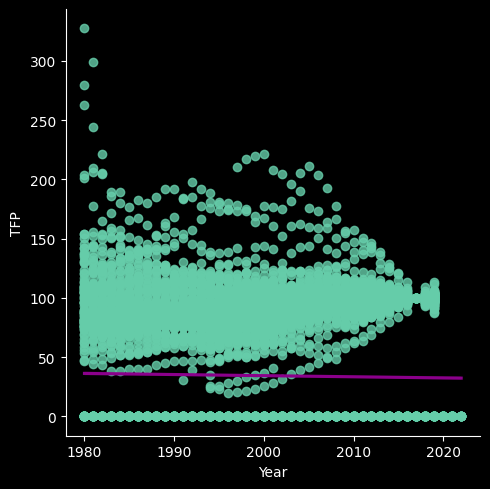

In [131]:
sns.lmplot(data=TGall[TGall["Year"] >= 1980], x="Year", y="TFP", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

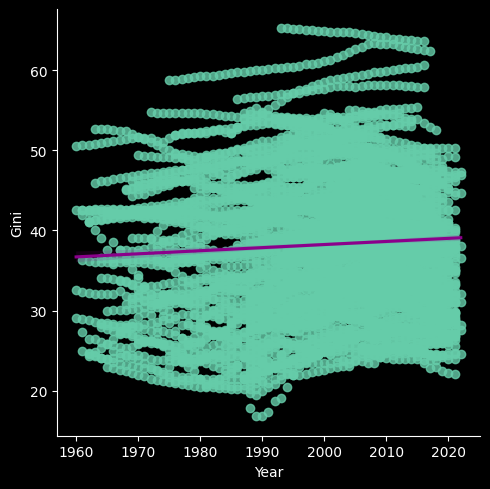

In [132]:
sns.lmplot(data=TGC(["Gini"],Year = True), x="Year", y="Gini", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

In [133]:
temp = TGall[["lnGDPPC", "GDPPC"]]
temp.loc[temp["lnGDPPC"] == float('-inf')]

,lnGDPPC,GDPPC


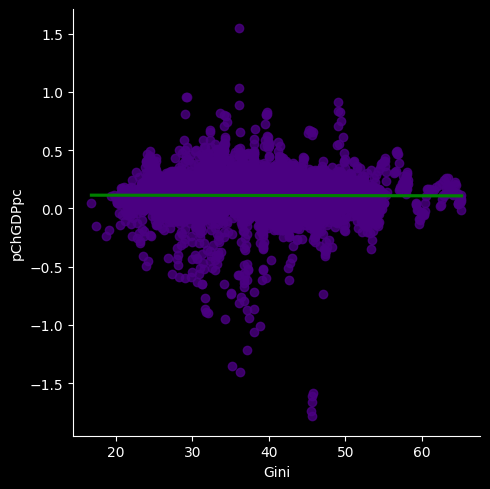

In [153]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
edc = TGall[["lnGDPPC", "Gini", "lnGDPPCm5"]].replace(0,np.nan).dropna(axis = 0)
#edc.tail(50)
edc["pChGDPpc"] = TGall["lnGDPPC"] - TGall["lnGDPPCm5"]
edc = edc[(edc["Gini"] <= -.01) | (edc["Gini"] >= .01)]
sns.lmplot(data=edc, x="Gini", y="pChGDPpc", line_kws={'color': 'green'}, scatter_kws = {'color' : 'indigo'})#, size = 10)

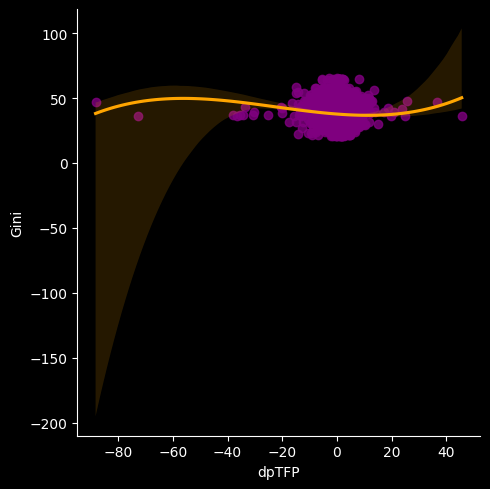

In [135]:
sns.lmplot(data=TGC(["dpTFP", "Gini"]), x="dpTFP", y="Gini", order = 3, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

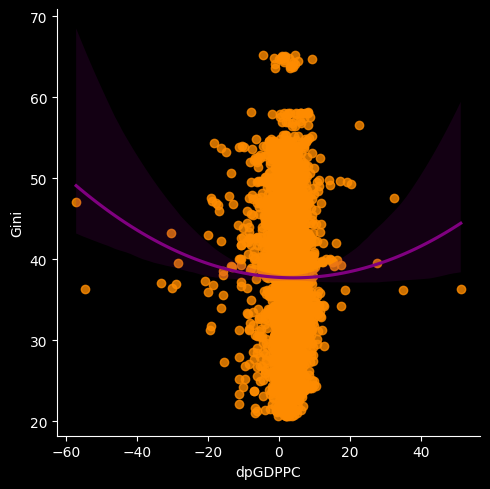

In [136]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "Gini"]), x="dpGDPPC", y="Gini", order = 2, line_kws={'color': 'purple'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)

In [137]:
TGC(["dpTFP", "lnGDPPC", "Gini"])

,dpTFP,lnGDPPC,Gini
30,2.276811,10.218507,35.3
31,-0.364701,10.230255,34.4
32,-2.080838,10.227777,33.6
33,0.108818,10.240293,33.3
34,1.653208,10.251150,33.1
...,...,...,...
17704,1.590923,9.219300,47.7
17705,1.244227,9.257606,47.7
17706,1.708778,9.297527,47.7
17707,0.797194,9.338254,47.6


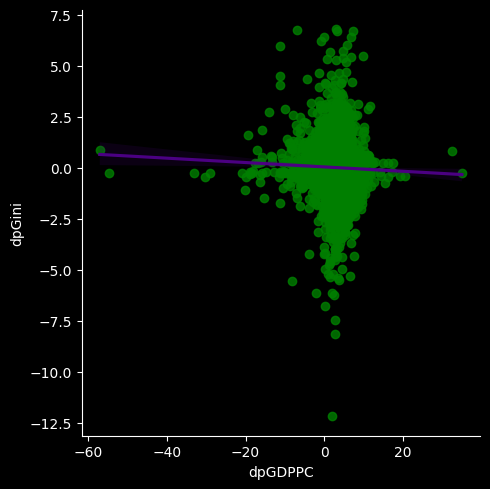

In [138]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "dpGini"]), x="dpGDPPC", y="dpGini", line_kws={'color': 'indigo'}, scatter_kws = {'color' : 'green'})#, size = 10)

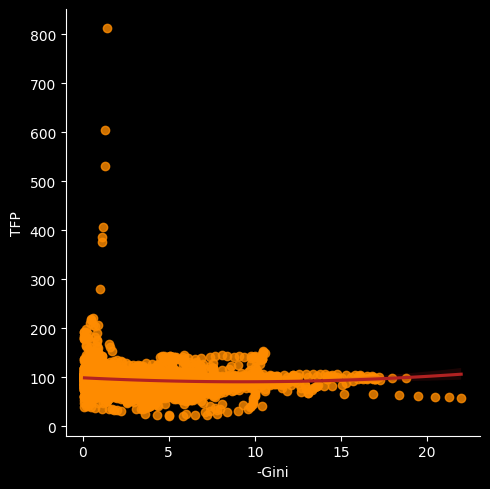

In [139]:
sns.lmplot(data=TGC(["TFP", "-Gini"]), y="TFP", x="-Gini", order = 2, line_kws={'color': 'firebrick'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)


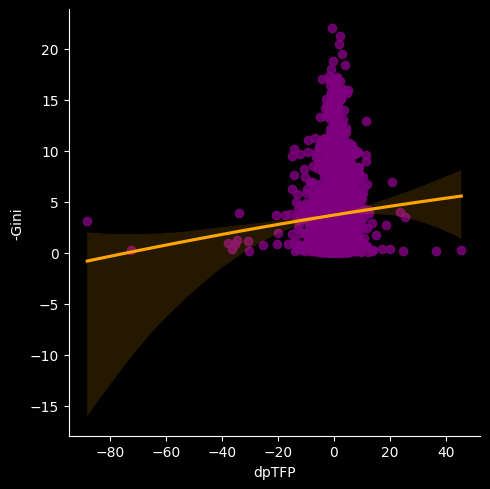

In [140]:
sns.lmplot(data=TGC(["dpTFP", "-Gini"]), x="dpTFP", y="-Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

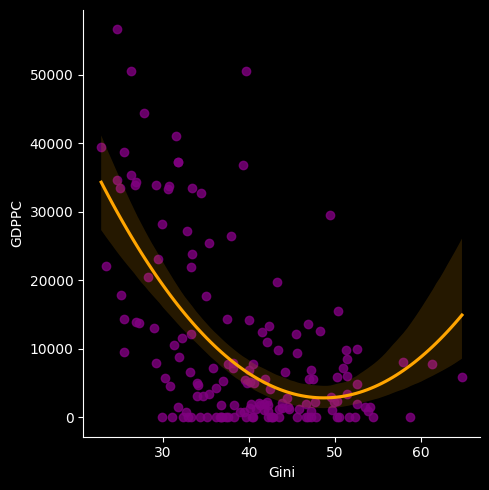

In [141]:
sns.lmplot(data=TGall[TGall["Year"] == 2001], y="GDPPC", x="Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

In [142]:
# sns.lmplot(data=cd(), x="TFP", y="Gini")

In [143]:
"""
from scipy import stats
penguins = sns.load_dataset("penguins")

sns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")
"""

'\nfrom scipy import stats\npenguins = sns.load_dataset("penguins")\n\nsns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")\n'

## dTFP and dGini
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

In [144]:
#def r2(x, y):
#    return stats.pearsonr(x, y)[0] ** 2

# r2(CC.dgdppc, CC.dGini)

In [145]:
#sns.regplot(data=tfp_gini, x="dTFP", y="Gini")

In [146]:
# mmm = sns.regplot(data=tfp_gini, x="dTFP", y="dGini", order=2)

# ML Regression

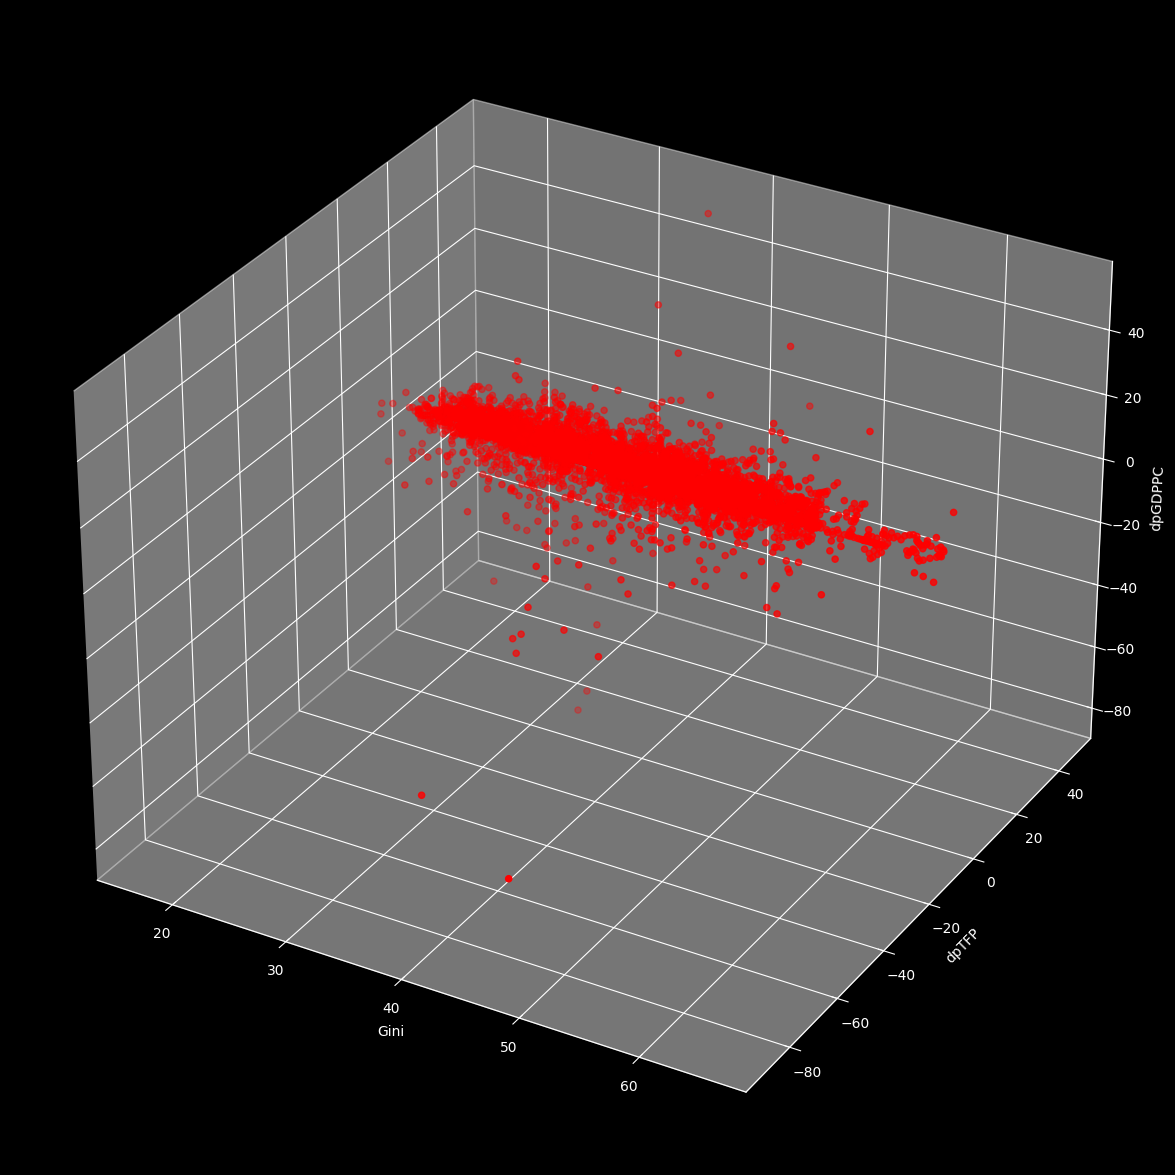

In [147]:
from ctypes import sizeof


fig=plt.figure(figsize=(15, 15))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP")
ax.set_zlabel("dpGDPPC")
plt.show()

In [148]:
#enerating training and testing data from our data:
# We are using 80% data for training.
train = tfp_giniCC[tfp_gini["Country"] != "Canada"]
test = cd("Canada")

# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["dTFP"]])
train_y = np.array(train[["dGini"]])
regr.fit(train_x,train_y)

C:\Users\joshu\AppData\Local\Temp\ipykernel_5880\3062030121.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = tfp_giniCC[tfp_gini["Country"] != "Canada"]


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

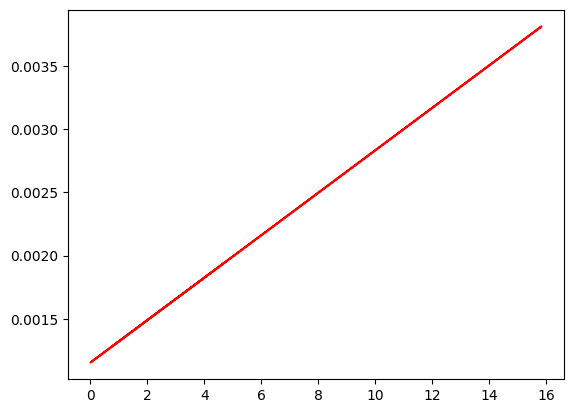

In [ ]:
ax.scatter(TGall["Gini"],TGall["dpTFP^2"],TGall["dpGDPPC^2"],color="red")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r',)
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP^2")
ax.set_zlabel("dpGDPPC^2")
plt.show()

In [ ]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_)

coefficients :  [[0.0001677]]
Intercept :  [0.00115386]


In [ ]:
"""
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['dTFP']]) 
test_y = np.array(test[['dGini']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
"""

'\n# Predicting values:\n# Function for predicting future values\ndef get_regression_predictions(input_features,intercept,slope):\n    predicted_values = input_features*slope + intercept\n    return predicted_values\n\n# Checking various accuracy:\nfrom sklearn.metrics import r2_score \ntest_x = np.array(test[[\'dTFP\']]) \ntest_y = np.array(test[[\'dGini\']]) \ntest_y_ = regr.predict(test_x)\nprint("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))\nprint("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))\nprint("R2-score: %.2f" % r2_score(test_y_ , test_y) )\n'

# Machine learning 2
https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

In [ ]:
X = tfp_giniCC[["dTFP"]]
y = tfp_giniCC["dGini"]
X.head()

,dTFP
246,4.731631
247,0.729859
251,6.883281
252,7.148701
253,3.500193


In [ ]:
#Initiate the theta values.
theta = np.array([0]*len(X.columns))

#number of training data
m = len(X)

def hypothesis(theta, X):
    return theta*X

#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [ ]:
##Gradient descent
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(int(sum((y1-y)*X.iloc[:,c])/len(X)))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [ ]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 1000)

In [ ]:
#Predict Outputs
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y

246      0.000000
247      0.000000
251      0.000000
252      0.000000
253      0.000000
           ...   
10142   -0.022930
10143    0.006310
10146   -0.024396
10147    0.013453
10148   -0.011143
Name: dGini, Length: 1124, dtype: float64

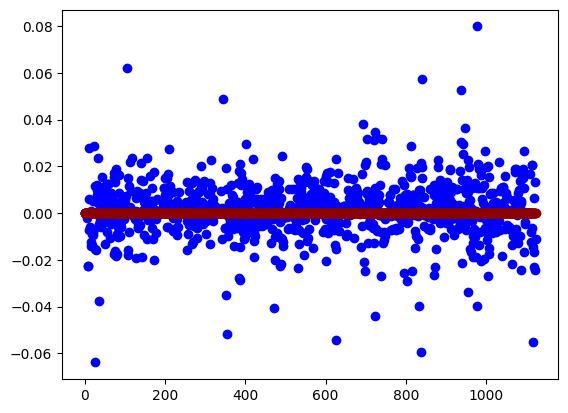

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = list(range(0, len(y))), y= y, color='blue')         
plt.scatter(x=list(range(0, len(y))), y=y_hat, color='darkred')
plt.show()

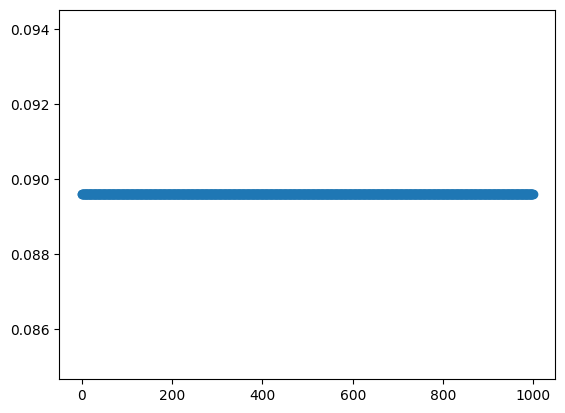

In [ ]:
#cost of each iteration
plt.figure()
plt.scatter(x=list(range(0, 1000)), y=J)
plt.show()

## Simple Linear Regression

In [ ]:
model = LinearRegression()
dTFP = tfp_giniCC['dTFP'].array.reshape((-1, 1))
dGini = tfp_giniCC['dGini'].array
model.fit(dTFP, dGini)
model = LinearRegression().fit(dTFP,dGini)

In [ ]:
## R^2
r_sq = model.score(dTFP, dGini)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.00052342165310304


In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 0.001184235744077955
slope: [0.00016677]


https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [ ]:
X = TGC(["lnGDPPC", "Gini"])
model = LinearRegression()
reg = model.fit(X['lnGDPPC'].values.reshape(-1, 1), X['Gini'].values.reshape(-1, 1))
y_pred = reg.predict(X['lnGDPPC'].values.reshape(-1, 1))
y_pred

array([[0.6220859 ],
       [0.62369084],
       [0.62638536],
       ...,
       [0.62203437],
       [0.6208082 ],
       [0.62008989]])

In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5"]].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 5.611e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:06:27   Log-Likelihood:                 855.10
No. Observations:                5001   AIC:                            -1702.
Df Residuals:                    4997   BIC:                            -1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3745      0.063     37.465      0.0

In [ ]:
X

,IVlnGG,IVGinim5,lnGDPPC,lnGDPPCm5
35,4.666377,0.656629,7.124478,7.334329
36,4.584025,0.656309,7.008505,7.293698
37,4.648410,0.655773,7.099202,7.225481
38,4.730976,0.655264,7.215240,7.160846
39,4.730975,0.655085,7.215240,7.138073
...,...,...,...,...
10564,5.074220,0.687966,7.374002,7.158550
10565,5.072050,0.685043,7.352441,7.245553
10566,5.073365,0.682044,7.335634,7.323171
10567,5.110568,0.684386,7.366677,7.380256


In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.648e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:06:27   Log-Likelihood:                 1051.5
No. Observations:                5001   AIC:                            -2091.
Df Residuals:                    4995   BIC:                            -2052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0922      0.156      0.593      0.5

In [160]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X = X[X.lnGDPPC > 10]
X.to_csv("tansferdata.csv")

In [ ]:
#( len(TGall['OilP'].dropna()) - len(TGall.Gini.dropna()) )/ len(TGall.Gini.dropna()) # lose 32% of data when OilP is included

In [ ]:
TGC(["IVlnGG"]).mean()

IVlnGG    5.552641
dtype: float64

In [ ]:
y = "lnGDPPC"
X = TGC(["Ginim5", "lnGGm5", "lnGDPPCm5", y], Year = True)

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
print(est2.predict())


[7.377754   7.33973297 7.27380767 ... 7.45190534 7.51231249 7.51466781]


In [ ]:
y = "Gini"
X = TGC(["lnGDPPC", y])

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
est2.predict([50,70])

array([42.82449183])

### Extremly predictive, dTFP on Gini

run on several years avg

Taxes, democracy, news freedom as control variable

In [ ]:
#TGall.tail().drop(columns = ["Year", "Country", ])
TGall["GDPPC"].mean()

10275.698980251966

In [ ]:
X = TGC(["dpTFP", "dpGini", "TMITR"], Year = False, FE = False)
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.686
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0266
Time:                        15:08:16   Log-Likelihood:                -426.36
No. Observations:                 230   AIC:                             858.7
Df Residuals:                     227   BIC:                             869.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3424      0.416      3.230      0.0

,dpTFP,dpGini,TMITR
2551,-0.047470,-1.869097,56.0
2552,-0.708872,0.350775,56.0
2553,1.192081,0.900365,56.0
2554,1.537896,-0.301101,56.0
2555,1.224112,0.490437,56.0
...,...,...,...
10213,0.195655,-1.082368,40.0
10214,0.468606,1.175529,40.0
10215,0.894222,-0.169030,40.0
10216,0.087231,0.126010,40.0


In [ ]:
X = TGC(["dpTFP", "dpTFP^2", "TMITR", "Gini"], Year = False)
X2 = sm.add_constant(X.drop(columns = ["Gini"]))
est = sm.OLS(X.Gini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     20.62
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.40e-12
Time:                        10:30:24   Log-Likelihood:                -647.78
No. Observations:                 232   AIC:                             1304.
Df Residuals:                     228   BIC:                             1317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5544      1.060     52.400      0.0

In [ ]:
#Average standard deviation per gini coefficient
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["Gini"], country = x)
    std += temp["Gini"].std()

print(std / tfp_gini["Country"].unique().size)

2.634583669254419


In [ ]:
tfp_gini.Gini.std()

10.12592272231087

In [ ]:
# Avg std for dNGini
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["dNGini"], country = x)
    std += temp["dNGini"].std()

print(std / tfp_gini["Country"].unique().size)

1.2514238751040614


In [ ]:
X = TGC(["dCTFP", "dNGini"])
X2 = sm.add_constant(X.drop(columns = ("dNGini")))
est = sm.OLS(X.dNGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dNGini   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.109
Date:                Tue, 07 Nov 2023   Prob (F-statistic):             0.0135
Time:                        10:30:28   Log-Likelihood:                -6973.4
No. Observations:                3839   AIC:                         1.395e+04
Df Residuals:                    3837   BIC:                         1.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0805      0.024      3.343      0.0

In [ ]:
X = TGC(["dTFP", "dpTFP^2", "NGini"])
X2 = sm.add_constant(X.drop(columns = ("NGini")))
est = sm.OLS(X["NGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  NGini   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.485
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.77e-05
Time:                        10:30:29   Log-Likelihood:                -13856.
No. Observations:                3953   AIC:                         2.772e+04
Df Residuals:                    3950   BIC:                         2.774e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7950      0.139    717.980      0.0

In [ ]:
X = TGC(["dpTFP", "dpGini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.711
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.38e-05
Time:                        10:30:29   Log-Likelihood:                -7073.0
No. Observations:                3884   AIC:                         1.435e+04
Df Residuals:                    3780   BIC:                         1.501e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
X = TGC(["dCTFP", "dpCTFP^2", "Gini"])
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     37.30
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           8.95e-17
Time:                        10:30:29   Log-Likelihood:                -14984.
No. Observations:                3987   AIC:                         2.997e+04
Df Residuals:                    3984   BIC:                         2.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7632      0.174    314.125      0.0

In [ ]:
X = TGC(["dpTFP", "dpGini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.711
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.38e-05
Time:                        10:30:30   Log-Likelihood:                -7073.0
No. Observations:                3884   AIC:                         1.435e+04
Df Residuals:                    3780   BIC:                         1.501e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
X = TGC(["TFP", "Gini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("TFP")))
est = sm.OLS(X["TFP"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    TFP   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     43.71
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:30:30   Log-Likelihood:                -15803.
No. Observations:                4024   AIC:                         3.181e+04
Df Residuals:                    3920   BIC:                         3.247e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
X = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.021
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.54e-06
Time:                        10:30:30   Log-Likelihood:                -6660.8
No. Observations:                3616   AIC:                         1.333e+04
Df Residuals:                    3610   BIC:                         1.337e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9301      4.138      1.675      0.0

In [ ]:
TGC(["dpTFP","GDPPC", "dpGDPPC", "dpGDPPC", "TMITR"], FE = False, Year = True).head(20)
#TGall[["dpTFP", "dpGDPPC"]].dropna()

,Year,dpTFP,GDPPC,dpGDPPC,dpGDPPC,TMITR
2525,1955,5.710741,9240.0,9.480519,9.480519,53.0
2526,1956,3.741735,9846.0,6.154784,6.154784,53.0
2527,1957,2.668569,10348.0,4.851179,4.851179,53.0
2528,1958,2.168600,10739.0,3.640935,3.640935,53.0
2529,1959,4.823923,11440.0,6.127622,6.127622,53.0
2530,1960,4.953004,12282.0,6.855561,6.855561,53.0
2531,1961,1.584998,12675.0,3.100592,3.100592,53.0
2532,1962,2.348157,13106.0,3.288570,3.288570,53.0
2533,1963,0.656448,13367.0,1.952570,1.952570,53.0
2534,1964,2.341571,14062.0,4.942398,4.942398,53.0


In [ ]:
X = TGC(["dpTFP", "dpTFP^2", "Gini", "dGDPPC", "dpGDPPC", "GDPPC", "TMITR"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     30.08
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           4.79e-29
Time:                        10:30:31   Log-Likelihood:                -592.28
No. Observations:                 230   AIC:                             1201.
Df Residuals:                     222   BIC:                             1228.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.2013     54.290      7.298      0.0

In [ ]:
TGC(["dpTFP", "dpTFP^2", "Gini", "dpGDPPC"], FE = False, Year = True)

,Year,dpTFP,dpTFP^2,Gini,dpGDPPC
30,1980,0.100873,0.010175,59.894040,0.326371
31,1981,-7.358551,54.148274,59.894049,-4.146839
32,1982,-3.047237,9.285651,59.894046,-7.059680
33,1983,1.450998,2.105395,59.894046,-6.677019
34,1984,2.812210,7.908525,59.894047,-2.303415
...,...,...,...,...,...
10564,2014,-1.446923,2.093587,63.012267,-0.627353
10565,2015,-1.824487,3.328752,63.201501,-2.179487
10566,2016,-1.953656,3.816770,63.390703,-1.694915
10567,2017,1.948935,3.798347,63.579859,3.056574
